# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [52]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage.color import rgb2gray
from skimage.draw import circle

from skimage.filters import threshold_otsu

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [34]:
# Definition of convolution
def conv_n(n, h, x):
    length_x = len(x)
    length_h = len(h)
    conv_sum = 0
    if(length_x <= length_h):
        for i in range(0, length_x):
            if(n-i < 0):
                h = 0
                conv_sum = conv_sum + x[i]*h
            else:
                conv_sum = conv_sum + x[i]*h[n-i]
    else:
        for i in range(0, length_h):
            if(n-i < 0):
                x = 0
                conv_sum = conv_sum + h[i]*x
            else:
                conv_sum = conv_sum + h[i]*x[n-i]
            
    return conv_sum

def conv_fn(x, h):
    if(len(x) >= len(h)):
        length = len(x) 
        h_new = np.zeros(len(h)+len(x))
        x_new = x
        for i in range(0, len(h)):
            h_new[i] = h[i]        
    else:
        length = len(h) 
        x_new = np.zeros(len(h)+len(x))
        h_new = h
        for i in range(0, len(x)):
            x_new[i] = x[i] 
    
    length = len(h) + len(x)
    convolution = np.zeros(length)
    for i in range(0, length):
        convolution[i] = conv_n(i, h_new, x_new)
    
    return convolution
            

# Definition of a Dirac function
def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s

# Definition of Step function
def step(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s

In [35]:
xn = [1, 2, 3, 4]

# Dirac 
drc = dirac(0, 5)
conv1 = conv_fn(xn, drc)
conv2 = np.convolve(xn, drc)
print("")
print("For dirac :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# Step 
stp = step(0, 5)
conv1 = conv_fn(xn, stp)
conv2 = np.convolve(xn, stp)
print("")
print("For step :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# Exponential
ex = [1, np.exp(1), np.exp(2), np.exp(3), np.exp(4)]
conv1 = conv_fn(xn, ex)
conv2 = np.convolve(xn, ex)
print("")
print("For the exponential :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# H = {-1, 1}
h = [-1, 1]
conv1 = conv_fn(xn, h)
conv2 = np.convolve(xn, h)
print("")
print("For H = {-1, 1} :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)




For dirac :

My answer :
[ 1.  2.  3.  4.  0.  0.  0.  0.  0.]
Python's answer :
[ 1.  2.  3.  4.  0.  0.  0.  0.]

For step :

My answer :
[  1.   3.   6.  10.  10.   9.   7.   4.   0.]
Python's answer :
[  1.   3.   6.  10.  10.   9.   7.   4.]

For the exponential :

My answer :
[   1.            4.71828183   15.82561976   47.01849461  127.80951949
  199.00913523  244.13659779  218.39260013    0.        ]
Python's answer :
[   1.            4.71828183   15.82561976   47.01849461  127.80951949
  199.00913523  244.13659779  218.39260013]

For H = {-1, 1} :

My answer :
[-1. -1. -1. -1.  4.  0.]
Python's answer :
[-1 -1 -1 -1  4]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [36]:
def conv_2D(x, h):   
    pad_vertical = int(np.floor(len(h)/2))
    pad_horizontal = int(np.floor(len(h[0])/2))
    
    new_x = np.zeros((len(x)+2*pad_vertical, len(x[0])+2*pad_horizontal))
    
    for i in range(pad_vertical, pad_vertical+len(x)):
        for j in range(pad_horizontal, pad_horizontal+len(x[0])):
            new_x[i][j] = x[i-pad_vertical][j-pad_horizontal]
            
    summ = 0
    for i in range(0, len(x)):
        for j in range(0, len(x[0])):
            for l in range(0, len(h)):
                for k in range(0, len(h[0])):
                    summ = summ + x[i][j]*h[l][k]#new_x[i+l-pad_vertical][j+k-pad_horizontal]*h[l][k]
            new_x[i+pad_vertical][j+pad_horizontal] = summ 
            summ = 0
            #print(summ)
    
    return new_x

In [37]:
H = [[1, 4, 6], [4, 16, 24], [6, 24, 36], [4, 16, 24], [1, 4, 6]] 
new_H = np.zeros((5,5))
for i in range(0, len(H)):
    for j in range(0, len(H[0])):
        H[i][j] = H[i][j]/256
        

X = np.zeros((3,3))
X = H
conv = conv_2D(X, H)
conv2 = convolve2d(X, H)
print("My convolution :")
print(conv)
print('')
print('')
print("Python's convolution :")
print(conv2)



My convolution :
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.00268555  0.01074219  0.01611328  0.        ]
 [ 0.          0.01074219  0.04296875  0.06445312  0.        ]
 [ 0.          0.01611328  0.06445312  0.09667969  0.        ]
 [ 0.          0.01074219  0.04296875  0.06445312  0.        ]
 [ 0.          0.00268555  0.01074219  0.01611328  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


Python's convolution :
[[  1.52587891e-05   1.22070312e-04   4.27246094e-04   7.32421875e-04
    5.49316406e-04]
 [  1.22070312e-04   9.76562500e-04   3.41796875e-03   5.85937500e-03
    4.39453125e-03]
 [  4.27246094e-04   3.41796875e-03   1.19628906e-02   2.05078125e-02
    1.53808594e-02]
 [  8.54492188e-04   6.83593750e-03   2.39257812e-02   4.10156250e-02
    3.07617188e-02]
 [  1.06811523e-03   8.5449218

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

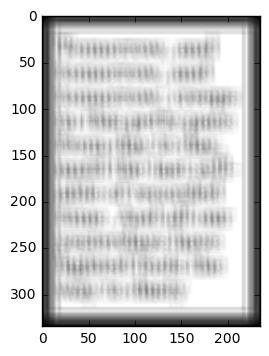

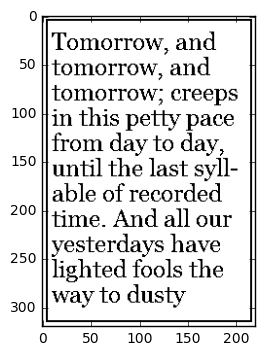

In [81]:
a = plt.imread("../images/a.png")
a = rgb2gray(a)
text = plt.imread("../images/text.png")
text = rgb2gray(text)
Ta = threshold_otsu(a)
Ttext = threshold_otsu(text)
aB = np.zeros((a.shape))
textB = np.zeros((text.shape))
for i in range(0, len(a)):
    for j in range(0, len(a[0])):
        if(a[i][j] >= Ta):
            aB[i][j] = 255
        else :
            aB[i][j] = 0
            
for i in range(0, len(text)):
    for j in range(0, len(text[0])):
        if(text[i][j] >= Ttext):
            textB[i][j] = 255
        
corr = correlate2d(textB, aB)
# The highest correlation values correspond to where the letter a is.

plt.figure()
plt.imshow(corr, cmap='gray')
plt.figure()
plt.imshow(textB, cmap='gray')

